In [45]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd

%config InlineBackend.rc = {}
%matplotlib inline

In [46]:
sample_img_filename = 'ADP.2014-09-16T11_49_48.040.fits'
hdu_list = fits.open(sample_img_filename)
hdu_list.info()

Filename: ADP.2014-09-16T11_49_48.040.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     278   (1514, 1496)   float32   


In [47]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1514                                                  
NAXIS2  =                 1496                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
IRAF-TLM= '2013-07-02T10:26:21' / Time of last modification                     
DATE    = '2013-07-02T10:11:56' / UT date when this file was written            
TELESCOP= 'ESO-NTT '           / ESO Telescope Name                             
INSTRUME= 'SOFI    '           / Instrument used.                               
OBJECT  = 'SN2012fr'           / Original target.                               
RA      =             53.42102 / 03:33:41.04 RA (J2000) pointing (deg)          
DEC     =             -36.10

In [59]:


image_data = hdu_list[0].data
image_data *= 255.0/image_data.max()
#hdu_list.close()
#del hdu_list
X = 502.26
Y = 529.24



In [58]:
image_data.shape

(1496, 1514)

In [50]:
#print np.mean(image_data)
vmin = np.mean(image_data)-np.std(image_data)
vmax = np.mean(image_data)+np.std(image_data)

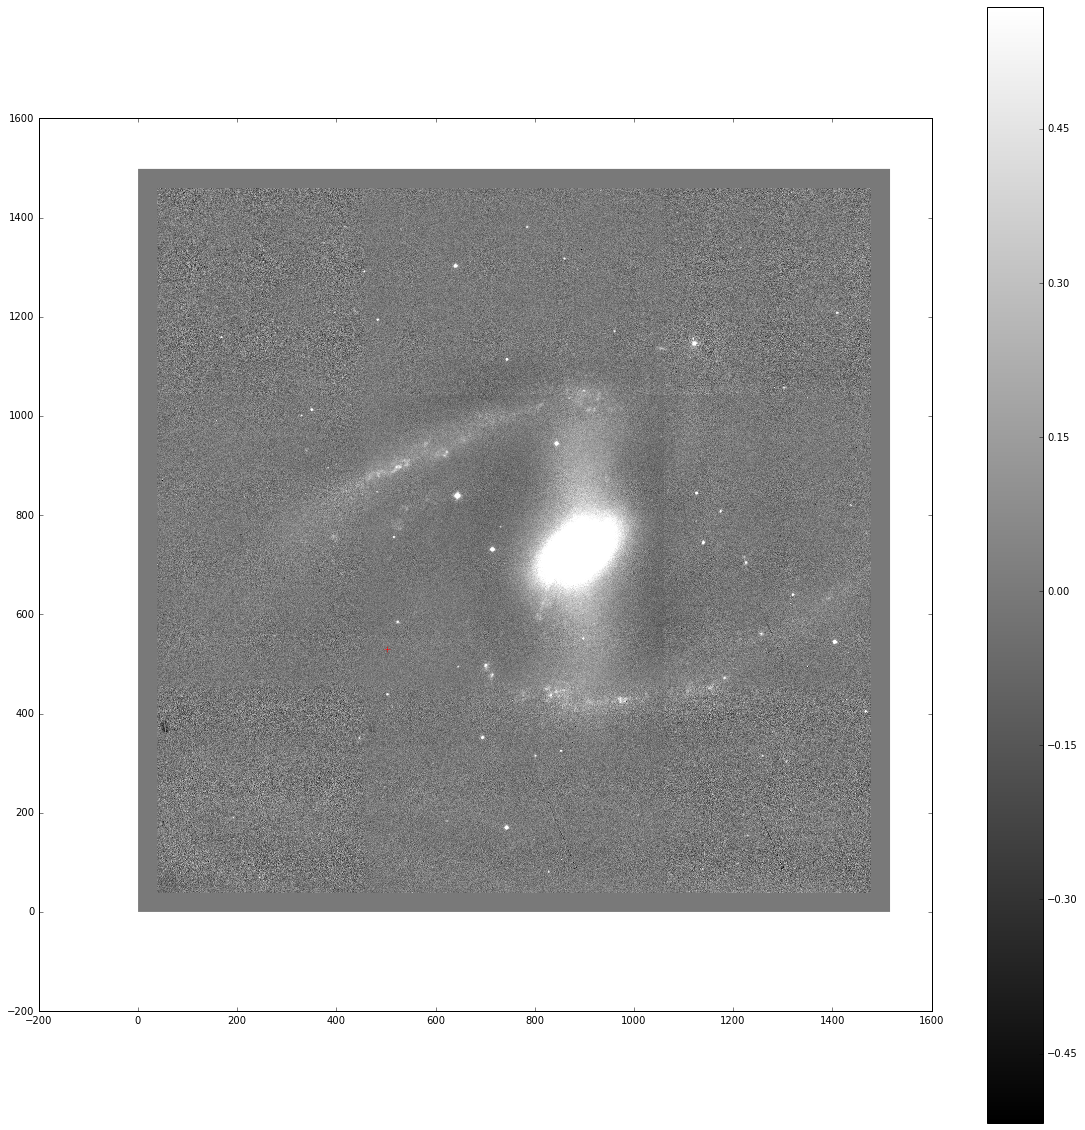

In [56]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(image_data, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)

plt.plot([ X ],[Y], 'r+')


      
plt.colorbar()

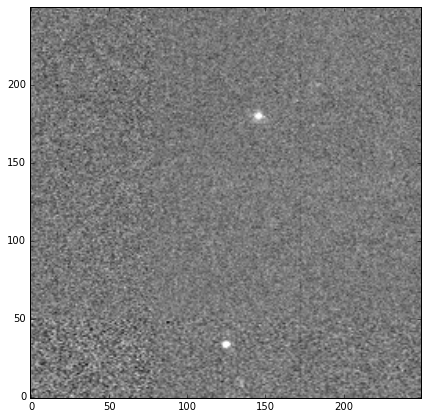

In [53]:
from PIL import Image
side = 250
s = side / 2
img = Image.fromarray(image_data).crop( (X-s,Y-s, X+s, Y+s))
plt.figure(figsize=(7,7))
crop = np.copy(np.asarray(img))
plt.imshow(crop, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)

In [54]:
from astropy.wcs import WCS
w = WCS(hdu_list[0].header)

In [61]:
px, py = w.wcs_world2pix(53.42102 , -36.1094, 1)
print px, py

502.26 529.24


In [62]:
px, py = w.wcs_world2pix(55.0 , -36.1094, 1)
print px, py

631.769762127 -15418.2842765
